In [21]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
import html
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt

In [22]:
pd.set_option('display.max_row', 10)
df = pd.read_csv('../website_classification.csv')
df.tail(10)

,website_url,cleaned_website_text,Category
1003,https://thejavasea.me/threads/meet-your-hot-sp...,meet your hot spicy threesome lovers lifeselec...,Adult
1004,https://thejavasea.me/threads/hype3d-collectio...,hyped collection thejavasea - technology world...,Adult
1005,https://thejavasea.me/threads/nsfw-natural-sel...,nsfw natural selection female wrestling final ...,Adult
1006,https://readysetcam.com/blogs/camming-101/best...,best cam sites to make money in highest paying...,Adult
1007,https://chaturbate.com/female-cams/?join_overl...,free chat with girls - live cam girls free web...,Adult
1008,https://www.slutroulettecam.com/?AFNO=1-86683-...,slut roulette - web cam video chatstay in touc...,Adult
1009,https://imlive.com/live-sex-chats/cam-girls/vi...,shieldsquare captchawe apologize for the incon...,Adult
1010,https://tour.camsoda.com/resp-t7/?id=corvelaym...,camsodacomsee live cam girls in your area toni...,Adult
1011,https://www.xcams.com/,live sex cam shows on xcams with stunning sexy...,Adult
1012,https://www.streamate.com/?%3Flangchoice=en,streamate - web cam video chatstay in touch th...,Adult


In [23]:
from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os


class ScrapTool:   
    def visit_url(self,website_url):
        '''
        Visit URL. Download the Content. Initialize the beautifulsoup object. Call parsing methods. Return Series object.
        '''
        #Set up Selenium webdriver
        PATH = 'C:/Users/User01/Downloads/chromedriver_win32/chromedriver.exe'

        # Set the Chrome webdriver options
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        # Initialize the Chrome webdriver and pass the Chrome options
        service = Service(PATH)
        driver = webdriver.Chrome(service = service, options = chrome_options)

        #Load website
        driver.get(website_url)
        
        # Check if the cookie consent button is present
        cookie_button = None
        try:
            cookie_button = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "cookie-consent-button")))
        except:
            pass

        # Handle cookies if the button is present
        if cookie_button:
            cookie_button.click()

        # Extract HTML content
        html_content = driver.page_source
        driver.quit()

        soup = BeautifulSoup(html_content,'lxml')
        result = {
            "website_url": website_url,
            "website_name": self.get_website_name(website_url),
            "website_text": self.get_html_title_tag(soup)+self.get_html_meta_tags(soup)+self.get_html_heading_tags(soup)+
                                    self.get_text_content(soup)
        }
        
        #Convert to Series object and return
        return pd.Series(result)
    
    def get_website_name(self,website_url):
        '''
        Example: returns "google" from "www.google.com"
        '''
        return "".join(urlparse(website_url).netloc.split(".")[-2])
    
    def get_html_title_tag(self,soup):
        '''Return the text content of <title> tag from a webpage'''
        return '. '.join(soup.title.contents)
    
    def get_html_meta_tags(self,soup):
        '''Returns the text content of <meta> tags related to keywords and description from a webpage'''
        tags = soup.find_all(lambda tag: (tag.name=="meta") & (tag.has_attr('name') & (tag.has_attr('content'))))
        content = [str(tag["content"]) for tag in tags if tag["name"] in ['keywords','description']]
        return ' '.join(content)
    
    def get_html_heading_tags(self,soup):
        '''returns the text content of heading tags. The assumption is that headings might contain relatively important text.'''
        tags = soup.find_all(["h1","h2","h3","h4","h5","h6"])
        content = [" ".join(tag.stripped_strings) for tag in tags]
        return ' '.join(content)
    
    def get_text_content(self,soup):
        '''returns the text content of the whole page with some exception to tags. See tags_to_ignore.'''
        tags_to_ignore = ['style', 'script', 'head', 'title', 'meta', '[document]',"h1","h2","h3","h4","h5","h6","noscript"]
        tags = soup.find_all(string=True)
        result = []
        for tag in tags:
            stripped_tag = tag.strip()
            if tag.parent.name not in tags_to_ignore\
                and isinstance(tag, bs4.element.Comment)==False\
                and not stripped_tag.isnumeric()\
                and len(stripped_tag)>0:
                result.append(stripped_tag)
        return ' '.join(result)

In [24]:
stop_words = []
stop_words.extend(["decemeber","dec","january","jan","feb","february","march","mar","may","april","apr","june","jun","july","jul","august","aug","september","sept","oct","october","nov","november",
                   "one","two","three","hundred","thousand","million","billion","today","tomorow","week","month","year","sign in","login","sign up"])

stop_words.extend(['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua', 'argentina', 'armenia', 'australia',
    'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize',
    'benin', 'bhutan', 'bolivia', 'bosnia', 'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina', 'burundi',
    'cambodia', 'cameroon', 'canada', 'cape', 'central', 'chad', 'chile', 'china', 'colombia', 'comoros',
    'congo', 'costa', 'croatia', 'cuba', 'cyprus', 'czech', 'denmark', 'djibouti', 'dominica', 'dominican',
    'east', 'ecuador', 'egypt', 'el', 'equatorial', 'eritrea', 'estonia', 'ethiopia', 'fiji', 'finland',
    'france', 'gabon', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea',
    'guyana', 'haiti', 'honduras', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'ireland',
    'israel', 'italy', 'jamaica', 'japan', 'jordan', 'kazakhstan', 'kenya', 'kiribati', 'korea', 'kosovo',
    'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein',
    'lithuania', 'luxembourg', 'macedonia', 'madagascar', 'malawi', 'malaysia', 'maldives', 'mali', 'malta',
    'marshall', 'mauritania', 'mauritius', 'mexico', 'micronesia', 'moldova', 'monaco', 'mongolia', 'montenegro',
    'morocco', 'mozambique', 'myanmar', 'namibia', 'nauru', 'nepal', 'netherlands', 'new', 'nicaragua',
    'niger', 'nigeria', 'norway', 'oman', 'pakistan', 'palau', 'panama', 'papua', 'paraguay', 'peru',
    'philippines', 'poland', 'portugal', 'qatar', 'romania', 'russia', 'rwanda', 'samoa', 'san', 'sao',
    'senegal', 'serbia', 'seychelles', 'sierra', 'singapore', 'slovakia', 'slovenia', 'solomon', 'somalia',
    'south', 'spain', 'sri', 'st.', 'sudan', 'suriname', 'swaziland', 'sweden', 'switzerland', 'syria',
    'taiwan', 'tajikistan', 'tanzania', 'thailand', 'timor-leste', 'togo', 'tonga', 'trinidad', 'tunisia',
    'turkey', 'turkmenistan', 'tuvalu', 'uganda', 'ukraine', 'united', 'uruguay', 'uzbekistan', 'vanuatu',
    'vatican', 'venezuela', 'vietnam', 'yemen', 'zambia', 'zimbabwe'])

stop_words.extend([
    'dollar', 'euro', 'pound', 'rupee', 'yen', 'yuan', 'won', 'franc', 'dinar', 'peso', 'lira', 'rupee', 'ruble',
    'koruna', 'baht', 'real', 'zloty', 'rand', 'shekel', 'krona', 'dirham', 'forint', 'colón', 'hryvnia',
    'leu', 'ringgit', 'kuna', 'lempira', 'cordoba', 'kwacha', 'taka', 'quetzal', 'birr', 'rial', 'tenge',
    'shilling', 'kwacha', 'naira', 'rial', 'dinar', 'rupiah', 'pula', 'riyal', 'dinar', 'lilangeni', 'krona',
    'franc', 'syli', 'peso', 'shilling', 'baht', 'vatu', 'bolivar', 'dong', 'rial'
])

In [25]:
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'_+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = text.split()
    tokens = [token for token in tokens if not token.isdigit()]
    cleaned_text = ' '.join(tokens)
    tokens = cleaned_text.split()
    tokens = [token for token in tokens if token not in stop_words]
    cleaned_text = " ".join(tokens)
    return cleaned_text

In [26]:
from darkwebScrapper import Scraper
def content_generation(website,dark_web):
    try:
        # scrapTool = ScrapTool()
        # web = scrapTool.visit_url(website)
        # text = cleaning_text(web['website_text'])
        web = Scraper(website,dark_web)
        text = cleaning_text(web)
        return text
    except Exception as e:
        print('Error: ',website)
        print(e)
        return None

In [29]:
websites = [
    ("http://intel2dgxaq5rua7spwmfzds3j53t4lpwgjvn4cng5pfiw7bfo2rchqd.onion/index.htm",True,"Intelligence"),
    ("http://gfilubpkimogfzsrsdg6l3vspc4wbvjwzsnt26wpzvvcbanxcuyg3lad.onion/",True,"Financial Crime"),
    ("http://kdpeukflyobnhlij5pkarzfkeysb75lqoslncqwfslwdiezw4kv7dmqd.onion/",True,"Financial Crime"),
    ("http://tnbgarjd2rqoqnjtm2bkjjmfwes6gwjzl3qz2sgau7xux2nixbnw2ayd.onion/",True,"Financial Crime"),
    ("http://jd6jwpcgx3bveuvvyvn7cwuef6n45ahfbxhizozb26poez42nliojxyd.onion/",True,"Financial Crime"),
    ("http://c3tys6zydktitzmr5rc2gduu6zlf3figrdh7mm3jprcipnn5xcqqgoqd.onion/",True,"Marketplace"),
    ("http://e5tm5d6b56gi7tysnx6hhrz2c5rwgagepoaa37trime2decdvfwos4id.onion/",True,"Financial Crime"),
    ("http://w24yjiwwy7ccuoccpu3alfskfdnoiwcsz7omqrhbbamjopps2k5ddaqd.onion/",True,"Marketplace"),
    ("http://2cpsvejqhz7mqeefmpkxf34gdyyynd23kwf6czeejeyxkenrrf4snsad.onion/",True,"Marketplace"),
    ("http://qidsbnpipfbz2htggxb7inxnhfqy5tftpl43xux6humnldddjopzfrqd.onion/",True,"Marketplace"),
    ("http://xpmr4xscmtuj5yuakukajn4kpya5vylumkziqexshaled7jytgm3vbad.onion/",True,"Financial Crime"),
    ("http://4p6i33oqj6wgvzgzczyqlueav3tz456rdu632xzyxbnhq4gpsriirtqd.onion/",True,"Narcotics"),
    ("http://h4lnnnb2jvf3mxb2otybwdomv3jix5bvfkcmwz5jhe3tvya2zoyb34id.onion/",True,"Marketplace"),
    ("http://tvfpx7rflcl6nd4agup5a7xniwdmpshttfcsmrpkdv4fda7ijy7uixad.onion/",True,"Financial Crime"),
    ("http://y3i3grhohcpeeadgugp4infwrcldt3fifa74x7cwdxeerouvuwujxbyd.onion/",True,"Financial Crime"),
    ("http://cocahzexpnmofimntbwbvuoxx337mwxf4tqqfatr4je7kfoi57f6mbid.onion/",True,"Narcotics"),
    ("http://hjvn22s2odhntwoakerjnimakfpt73owhmmp6ew6apthwrkvl4eyrlqd.onion/",True,"Narcotics"),
    ("http://saturnvsmldhvbi3phbrxvirsyxucfuxrsljddxha2q5cjzevmnm72id.onion/",True,"Adult"),
    ("http://4wmicvgfju43ejudk2km3a7jhkwyewtgwwxbttcquca4fm3tilmtocyd.onion/",True,"Narcotics"),
    ("http://anitavm67bkrwbojjjf5adfh6jmdrswrzwo4vi5bovoghnrwigooouid.onion/",True,"Adult"),
    ("http://livbexssnk6oqr4vqx4au4plfh5kz5ywmkoekysm6jlunphclvs4jtqd.onion/",True,"Financial Crime"),
    ("http://ly75dbzixy7hlp663j32xo4dtoiikm6bxb53jvivqkpo6jwppptx3sad.onion/",True,"Marketplace"),
    ("http://4t4ki52bkw46s6zfxnnlcnzrqjv4zdp5kwmqeqtouwbixuxp5kfcxyad.onion/",True,"Narcotics"),
    ("http://rp4ticvmvfdrbk4e35isjeacz6ayociuq3lmxxp3emrfialrkrnq7cid.onion/",True,"Narcotics"),
    ("http://thcxxktd3np2xub2raekzawzk5c276joyh44kvqy6zgcgdcfnr6zhkyd.onion/",True,"Narcotics"),
    ("http://bcrkrenpcp6jvszphqpvslaaapwsiuvgauus6ifuzv6ymajy3czmt5qd.onion/",True,"Marketplace"),
    ("http://nyb3sgobnm6hl5ujty2gfbmmv2665x6xpflen7r4hux5knbocldvpuad.onion/",True,"Marketplace"),
    ("http://smokerz7sfhol6c6elu5shwv3fahclr4jxvdfuggfdkgwjmwm5uw3mid.onion/",True,"Narcotics"),
    ("http://gn74rz534aeyfxqf33hqg6iuspizulmvpd7zoyz7ybjq4jo3whkykryd.onion/",True,"Narcotics"),
    ("http://apple6ftitjilrev6iro3bm3jvxgj5munypcikv3w5ef4m6oxh2cwjqd.onion/",True,"Marketplace"),
    ("http://xf2gry25d3tyxkiu2xlvczd3q7jl6yyhtpodevjugnxia2u665asozad.onion/",True,"Narcotics"),
    ("http://drugsednqhasbyoyg2oekzbnllbujro54zrogqbf3p6e7qflxti5eeqd.onion/",True,"Marketplace"),
    ("http://s6etue47chjq5j6ztavq7rtwgosw7qfal5vy3pficcaaadbzcl4u2gad.onion/",True,"Adult"),
    ("http://skycashbip7oxeut43aj2f62mikb3rsdua2ia2ge4loxqnstemjfziad.onion/",True,"Financial Crime"),
    ("http://blackzghghndv54l43hbu2mhwskwtqebdk2fudunwjdduydk6tx64sid.onion/",True,"Marketplace"),
    ("http://m16.espykp4bdrl7cuxfrwzbxpfowck5t5t4hlbbf7zkh4hdtwbgnq2igbyd.onion/",True,"Adult"),
    ("http://sentimental.o2ok2mpxd57stlhjjiu54owarb7v47zmdlihxajartrkemgmkk5y44yd.onion/",True,"Adult"),
    ("http://sk7u26ufvco3cbwhnpt2igbfunt3eovsktptmyef5keh26t66s4bbzyd.onion/",True,"Adult"),
    ("http://bilinmiyor.anonblogd4pcarck2ff6qlseyawjljaatp6wjq6rqpet2wfuoom42kyd.onion/",True,"Marketplace"),
    ("http://34vs22wmxqrh7hcseld7hreku5jtghkvvnmhxywpm5fc6cpll2pv73ad.onion/",True,"Narcotics"),
    ("http://anony3cdmhq2c4kv2wnknfjgq7rhomy4arywktjwmirhbhdirzy5pwid.onion/",True,"Marketplace"),
    ("http://c7fhkjr2zifyhrxpwvi2wvwkvtldwhfpr6xevux4fxupsaqcvphbfxqd.onion/",True,"Financial Crime"),
    ("http://ezze4txwif2yfymict7p53zxzjclgaivk5zxtfsj6mrwivn5coerw3yd.onion/",True,"Adult"),
    ("http://weedstcjxcvw6qmdvjfjw65wfpl5jv255by7qjzrvcbpdxpde7iztkad.onion/",True,"Narcotics"),
]

for website in websites:
    try:
        content = content_generation(website[0],website[1])
        print(content)
        content_list = [website[0],content,website[2]]
        df.loc[len(df)] = content_list
    except Exception as e:
        print(website,": ",e)


Getting... http://intel2dgxaq5rua7spwmfzds3j53t4lpwgjvn4cng5pfiw7bfo2rchqd.onion/index.htm
ï ç å æ å ï¼ å å¼ ï¼ äº æ ã ã ³ã ã ¼ classified intel exchange intelexchange japanese about classified intel exchange center about i am an intelligence expert and i have been active in the dark web for a long time i am interested in all kinds of classified intelligence information related to politics economy military technology and etc whether you are an intelligence expert or someone who wants to sell or buy intelligence welcome to contact me my emailï¼ kenro tuta io ã please contact me using pgp encryption my pgp key is pgp
Getting... http://gfilubpkimogfzsrsdg6l3vspc4wbvjwzsnt26wpzvvcbanxcuyg3lad.onion/
bazaar plastic bazaar plastic buy credit cards paypal acc counterfeits cloned cards counterfeits paypals bank accounts about info contact bazaar plastic is known as of the largest carding stores all transactions pass through the escrow service this is how normal credit card processing works and

In [30]:
df['Category'].value_counts()

Computers and Technology           302
Social Networking and Messaging    114
Business/Corporate                 106
E-Commerce                         101
News                                93
                                  ... 
Adult                               60
Financial Crime                     51
Intelligence                        34
Forums                              16
Marketplace                         13
Name: Category, Length: 12, dtype: int64

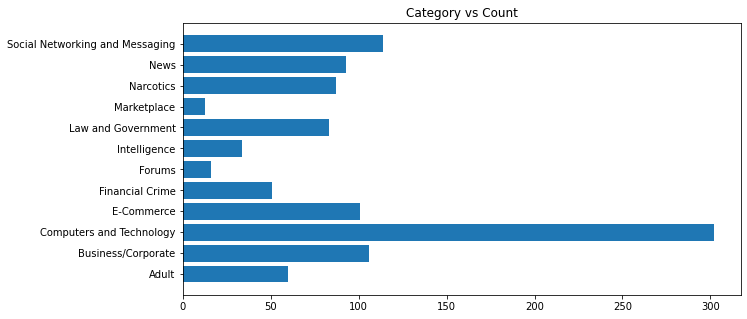

In [31]:
#visualising the count of each category
plt.figure(figsize=(10,5))
plt.title("Category vs Count")
site_category_count = pd.DataFrame(df.groupby(df['Category']).size(),columns=['Count'])
plt.barh(width=site_category_count['Count'],y=site_category_count.index)
plt.show()

In [36]:
df.loc(df["Category"]=="E-Commerce","Category") = "Marketplace"

C:\Users\shrey\AppData\Local\Temp/ipykernel_45348/2453797511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Category"]=="E-Commerce"]["Category"] = "Marketplace"


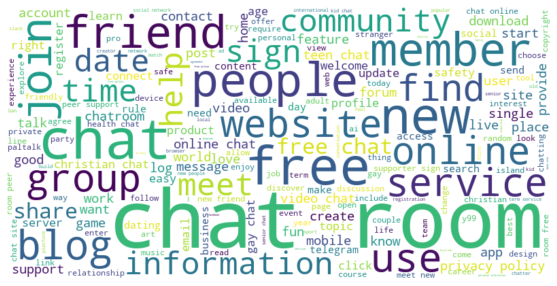

In [68]:
from wordcloud import WordCloud

category_name = "Social Networking and Messaging"
category_data = df[df["Category"]==category_name]['cleaned_website_text']
category_text = ' '.join(category_data)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

important_words = wordcloud.words_.keys()


In [47]:
important_words = ["none","phone","fax"]

df.loc[df["Category"]=="Intelligence","cleaned_website_text"] = df.loc[df["Category"]=="Intelligence","cleaned_website_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in important_words]))

In [49]:
df.reset_index(drop=True, inplace=True)

In [51]:
df.to_csv("website_classification.csv",index=False)
# computers.to_csv("../Hierarchal model/Computer/computer_subcategory_classification.csv",index=False)